In [2]:
pip install scikit-image watermark -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

[OpenCV](https://opencv.org/) ("Open Computer Vision") es una librería de código abierto de visión artificial desarrollada originalmente por Intel. Implementada en `C++` pero con APIs en multiples lenguajes, con soporte multiplataforma, es una de las librerías más populares y utilizadas de computer vision. Incluye una gran cantidad de funcionalidad relacionada a la visión artificial.

[watermark](https://github.com/rasbt/watermark) es una extensión de las "magic functions" de jupyter que permite verificar fácilmente la versión de python y de las librerías instaladas.

In [2]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2025-09-17T17:36:32.730898-03:00

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.18.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.9.4
numpy     : 2.0.2
cv2       : 4.12.0



##Input Image

In [4]:
import urllib.request
# Descarga de imagen de ejemplo
url = "https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg?dl=1"
ruta_destino = "coins.png"  # Se guarda en la carpeta actual

urllib.request.urlretrieve(url, ruta_destino)

print("📁 Imágenes descargadas:")
print("mandril.png - Imagen natural con detalles finos")
print("scale.png - Imagen sintética para análisis técnico")

#https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.coins
#wget https://opencollection.brooklynmuseum.org/archives/image/51611

📁 Imágenes descargadas:
mandril.png - Imagen natural con detalles finos
scale.png - Imagen sintética para análisis técnico


## Leer y mostrar la imagen

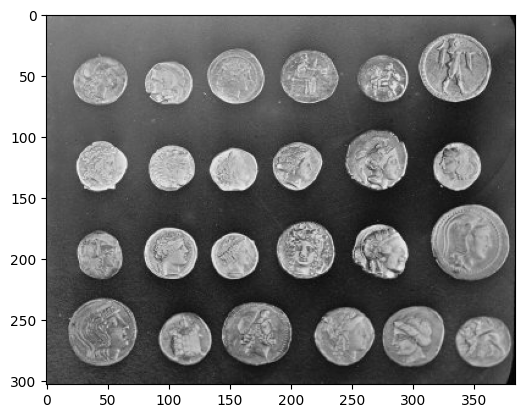

In [50]:
img = imread('coins.png')
plt.imshow(img)
plt.show()

In [7]:
type(img)

numpy.ndarray

## Funcion ¿cómo es esta imagen?

In [51]:
def data_img(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

data_img(img)

size =  (303, 384, 3)
max  =  252
min  =  1


¿Qué son estas dimensiones?

La función data_img nos muestra la forma de la imagen a través de img.shape. Esta tupla nos indica las dimensiones de la imagen. Las dos primeras dimensiones corresponden al alto (height) y al ancho (width) de la imagen, respectivamente. Por ejemplo, si img.shape devuelve (305, 200, 3), significa que la imagen tiene 305 pixeles de alto, 200 pixeles de ancho y 3 canales de color (RGB).

## Recortar / cropear

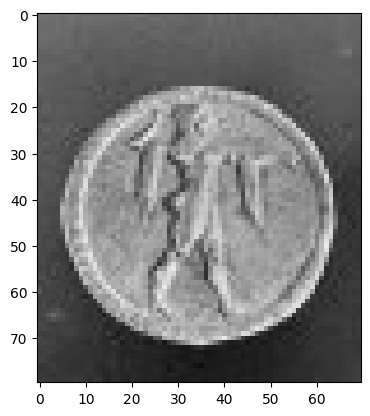

In [52]:
# Primero alto, despues ancho
img_cropped = img[0:80, 300:370]
plt.imshow(img_cropped)

In [53]:
data_img(img_cropped)

size =  (80, 70, 3)
max  =  234
min  =  14


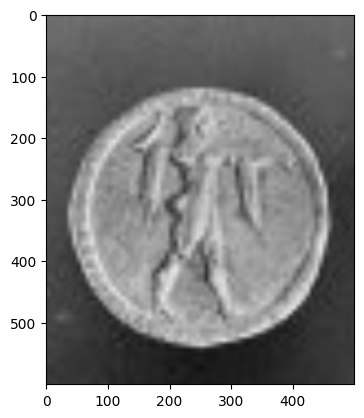

In [54]:
# Primero ancho y despues alto
img_resize = cv2.resize(img_cropped, (500, 600))
plt.imshow(img_resize)

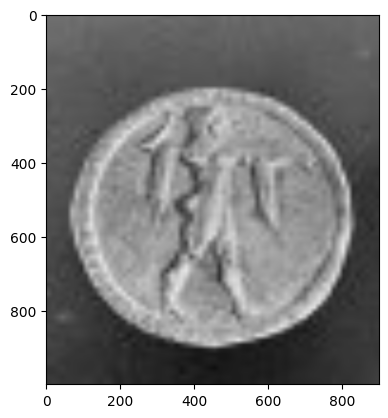

In [55]:
# Primero ancho y despues alto
img_resize = cv2.resize(img_cropped, (900, 1000))
plt.imshow(img_resize)

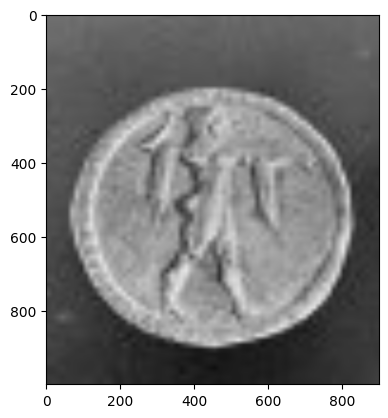

In [56]:
imgResizeA = cv2.resize(img_cropped, (200, 300))
plt.imshow(img_resize)

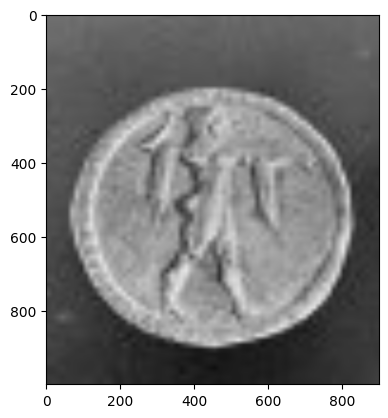

In [57]:
imgResizeB = cv2.resize(img_cropped, (700, 800))
plt.imshow(img_resize)

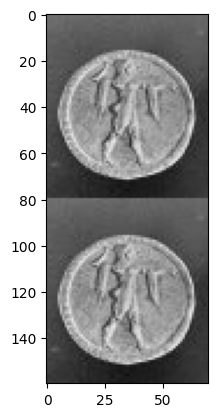

In [58]:
# Apilado vertical
vertical = np.vstack((img_cropped, img_cropped
                 ))
plt.imshow(vertical);

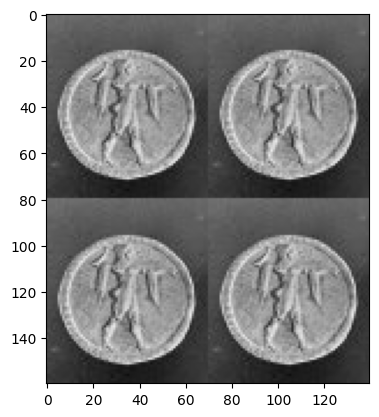

In [59]:
# Apilamos horizontamente dos filas, generando una "matriz" de 2x2
horizontal = np.hstack((vertical, vertical))
plt.imshow(horizontal);

## Selección del primer canal

In [60]:
X = img_cropped[:,:,0]
data_img(X)

size =  (80, 70)
max  =  234
min  =  14


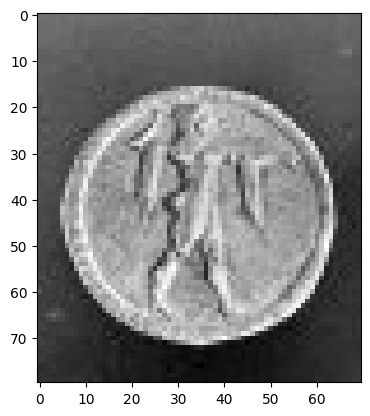

In [61]:
plt.imshow(X,cmap='gray')
plt.show()

Para usar esta función llamamos a [`cv2.Canny()`](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html). El primer parámetro es la imagen en la que queremos detectar los bordes. El segundo y el tercer parámetro configuran la sensibilidad del algoritmo. Valores típicos son: `(100, 200)`, `(50, 100)`, `(150, 200)`. El tercero debe ser más alto que el primero (uno es un mínimo y otro es un máximo). Valores bajos harán al algoritmo más sensible (esto es, detectará más bordes) y valores más altos harán que detecte menos bordes.

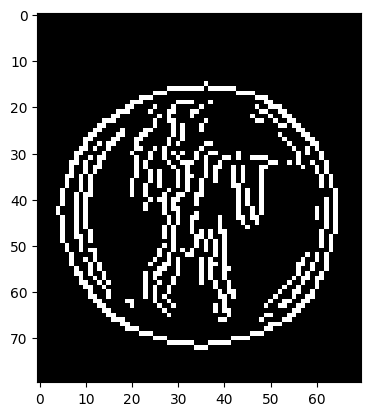

In [62]:
img_canny = cv2.Canny(img_cropped, 200, 250)
plt.imshow(img_canny, cmap='gray');

En OpenCV y NumPy, las imágenes a color se almacenan como arrays de 3 dimensiones:

* Primera dimensión (altura): número de filas
* Segunda dimensión (ancho): número de columnas
* Tercera dimensión (canales): 3 valores para BGR (Blue, Green, Red)

La notación [:,:,0] utiliza el indexado de NumPy donde:

* : significa "tomar todos los elementos" de esa dimensión
* 0 significa "tomar solo el primer canal"

Por ejemplo, si tenemos una imagen de 100x200 píxeles:

* img_cropped[: , : , 0] - Canal Rojo (primer canal)
* img_cropped[: , : , 1] - Canal Verde (segundo canal)
* img_cropped[: , : , 2] - Canal Azul (tercer canal)

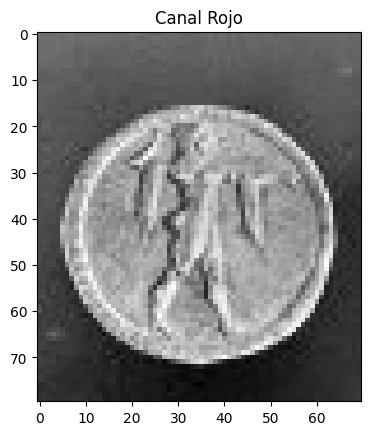

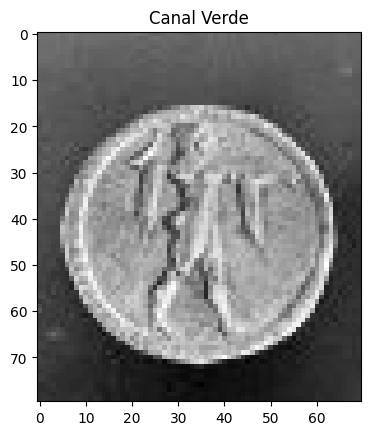

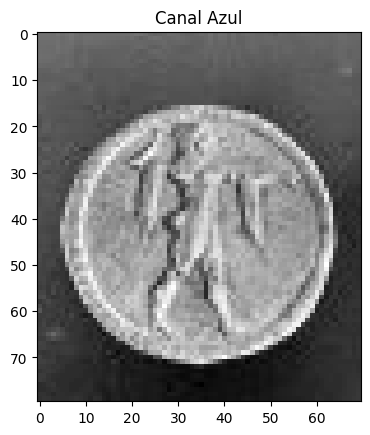

In [63]:
# Canal Rojo
X_red = img_cropped[:,:,0]
plt.imshow(X_red, cmap='gray')
plt.title('Canal Rojo')
plt.show()

# Canal Verde
X_green = img_cropped[:,:,1]
plt.imshow(X_green, cmap='gray')
plt.title('Canal Verde')
plt.show()

# Canal Azul
X_blue = img_cropped[:,:,2]
plt.imshow(X_blue, cmap='gray')
plt.title('Canal Azul')
plt.show()

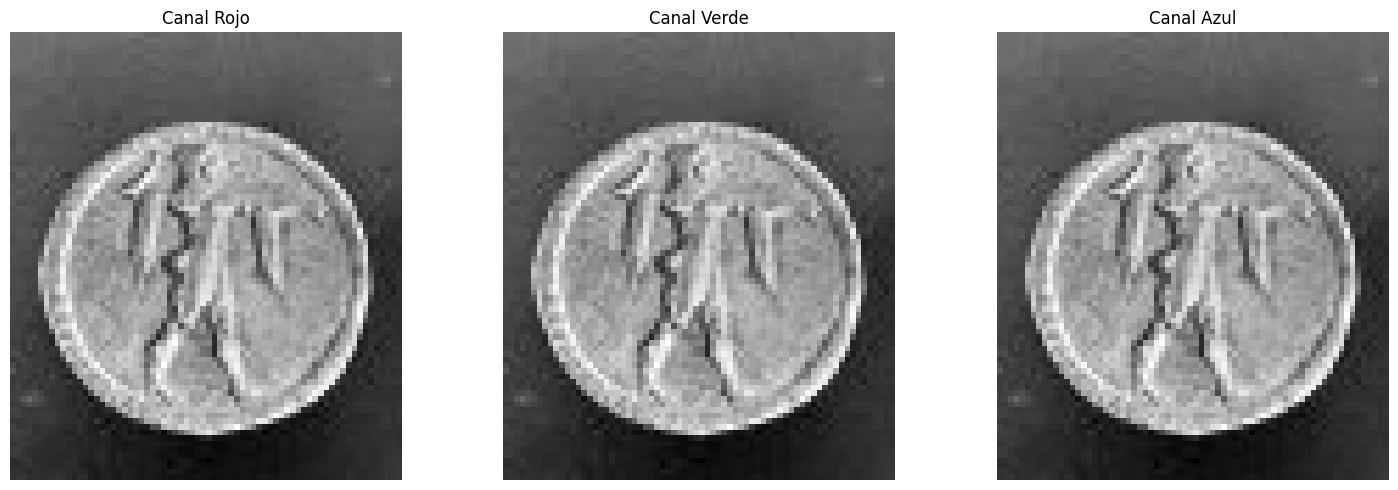

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Canal Rojo
axes[0].imshow(img_cropped[:,:,0], cmap='gray')
axes[0].set_title('Canal Rojo')
axes[0].axis('off')  # oculta los ejes

# Canal Verde
axes[1].imshow(img_cropped[:,:,1], cmap='gray')
axes[1].set_title('Canal Verde')
axes[1].axis('off')

# Canal Azul
axes[2].imshow(img_cropped[:,:,2], cmap='gray')
axes[2].set_title('Canal Azul')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [24]:
# Descargar otra imagen de ejemplo
url2 = "https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/124084.jpg?dl=1"
ruta_destino2 = "flores.jpg"  # Se guarda en la carpeta actual

urllib.request.urlretrieve(url2, ruta_destino2)

print("📁 Imágenes descargadas:")
print("flores.jpg - Imagen natural con colores vibrantes")

📁 Imágenes descargadas:
flores.jpg - Imagen natural con colores vibrantes


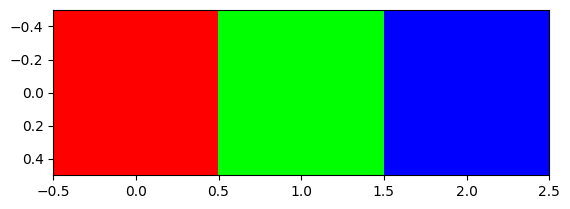

In [65]:
# Todo rojo, nada de verde, nada de azul ==> rojo
pixel1 = (255, 0, 0)

# Todo rojo, todo verde, nada de azul ==> amarillo
pixel2 = (0, 255, 0)

# Todo rojo, nada verde, todo azul ==> purpura
pixel3 = (0, 0, 255)

plt.imshow([[pixel1, pixel2, pixel3]]);

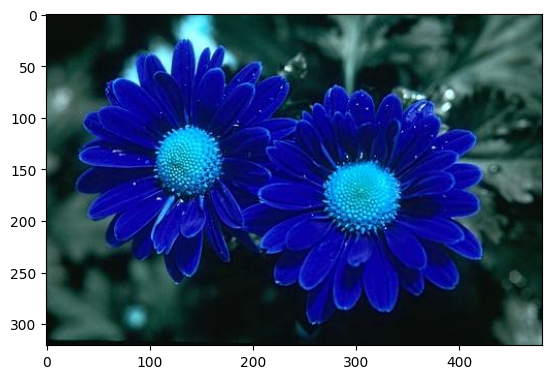

In [66]:
img = imread('flores.jpg')
plt.imshow(img)
plt.show()

In [67]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [68]:
img[0, 0]

array([10, 14,  9], dtype=uint8)

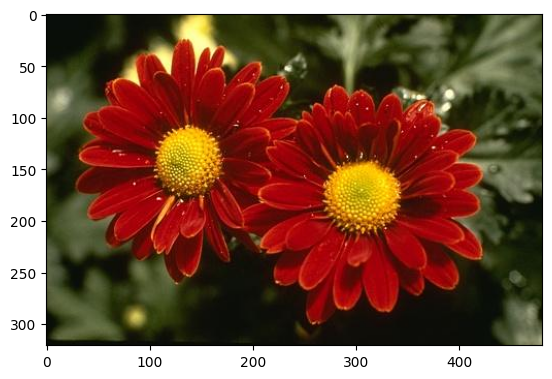

In [69]:
plt.imshow(img_rgb);

## Thresholding - Segmentación simple

In [70]:
def segmenta(X,t):
    # X: imagen de entrada (matriz 2D)
    # t: valor de umbral (threshold)

    (N,M) = X.shape  # Obtiene dimensiones de la imagen
    Y = np.zeros((N,M))  # Crea matriz de ceros del mismo tamaño
    area = 0  # Inicializa contador de píxeles

    # Recorre cada píxel de la imagen
    for i in range(N):  # Recorre filas
        for j in range(M):  # Recorre columnas
            if X[i,j] > t:  # Si el píxel supera el umbral
                Y[i,j] = 255  # Lo marca como blanco
                area = area + 1  # Incrementa el contador

    print('area = ',area)  # Imprime área total
    return Y  # Devuelve imagen segmentada

## Segmentación

area =  2356
size =  (80, 70)
max  =  255.0
min  =  0.0


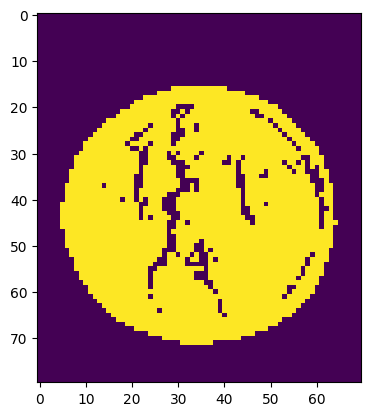

In [71]:
# 1. Llamada a la función de segmentación
Y = segmenta(X, 120)  # Segmenta la imagen usando umbral 120

# 2. Analiza las propiedades de la imagen resultante
data_img(Y)

# 3. Visualiza la imagen segmentada
plt.imshow(Y)
plt.show()

area =  4035
area =  2356
area =  1150


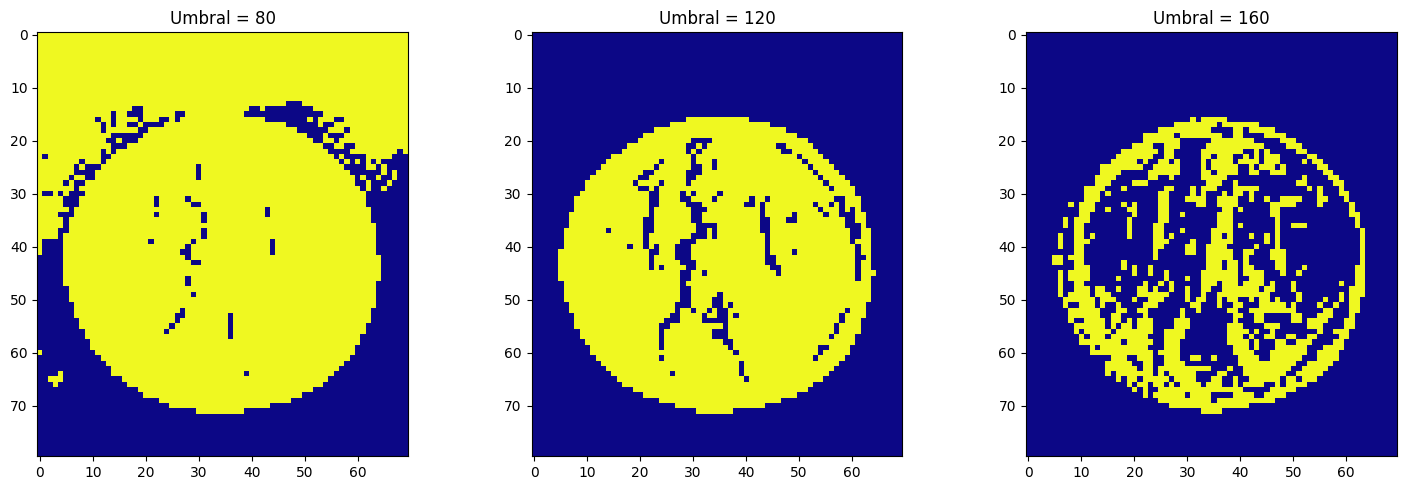

In [72]:
# Definimos los umbrales que queremos probar
umbrales = [80, 120, 160]

# Creamos una fila con 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, umbral in enumerate(umbrales):
    Y = segmenta(X, umbral)   # segmenta con el umbral elegido
    axes[i].imshow(Y, cmap='plasma')
    axes[i].set_title(f'Umbral = {umbral}')
    axes[i].axis('on')

plt.tight_layout()
plt.show()


area =  763
area =  171
area =  38


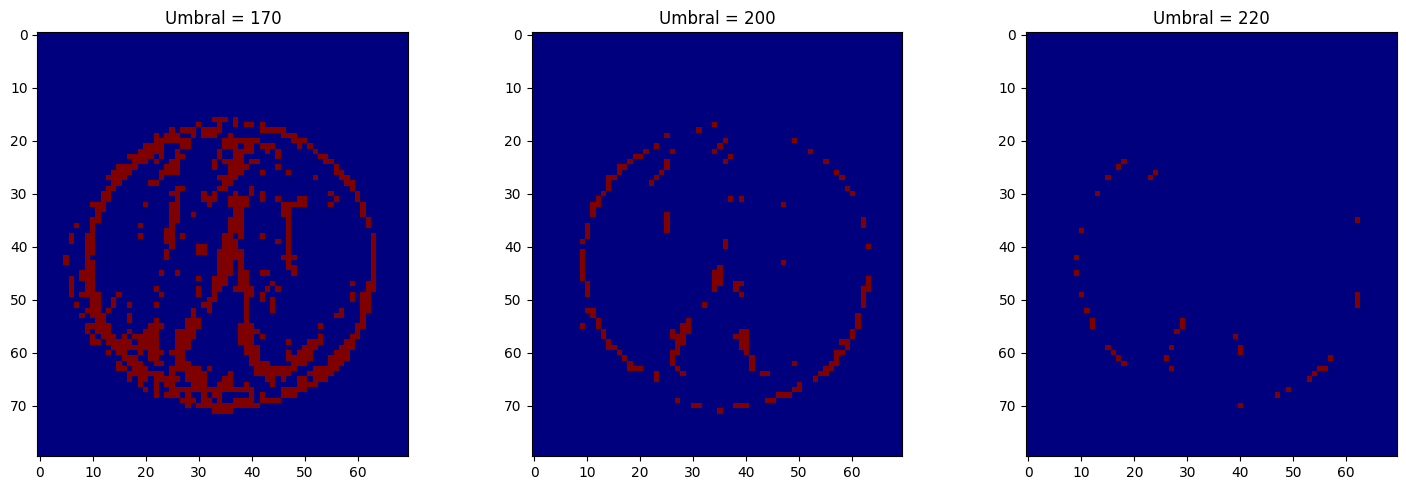

In [73]:
# Definimos los umbrales que queremos probar
umbrales = [170, 200, 220]

# Creamos una fila con 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, umbral in enumerate(umbrales):
    Y = segmenta(X, umbral)   # segmenta con el umbral elegido
    axes[i].imshow(Y, cmap='jet')
    axes[i].set_title(f'Umbral = {umbral}')
    axes[i].axis('on')

plt.tight_layout()
plt.show()


# Todas las monedas

size =  (303, 384)
max  =  252
min  =  1


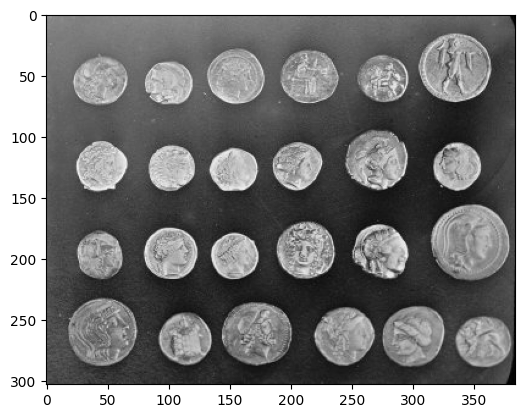

In [74]:
full_img = imread('coins.png')
X   = full_img[:,:,0]
data_img(X)
plt.imshow(X,cmap='gray')
plt.show()

area =  48864


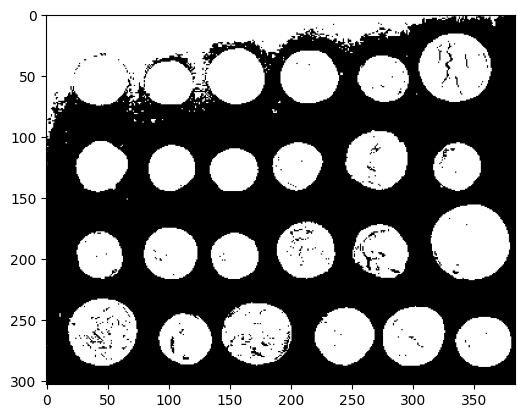

area =  35567


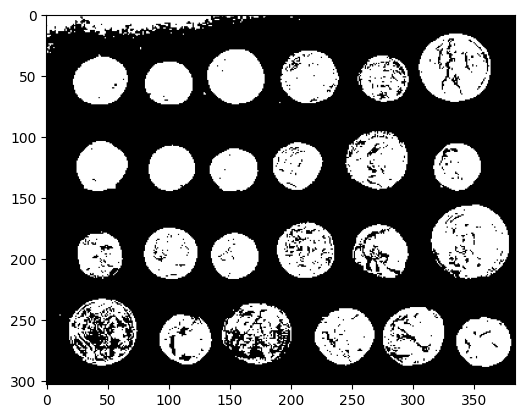

area =  23765


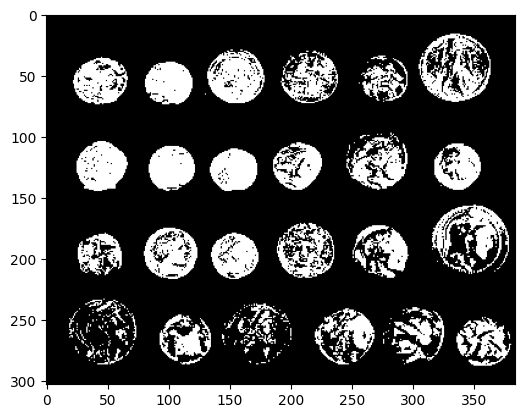

area =  3331


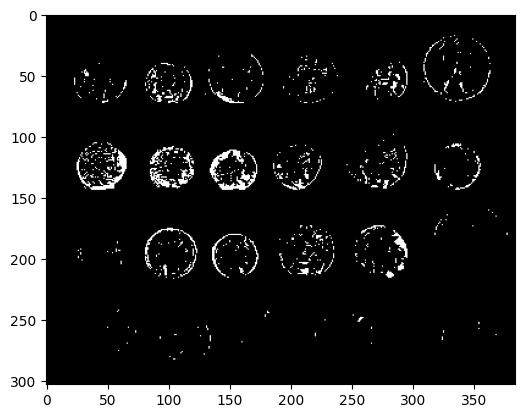

area =  802


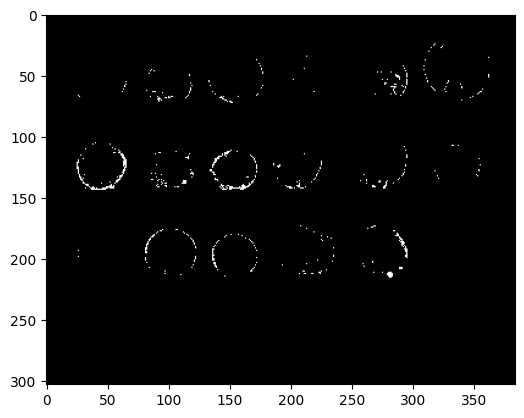

In [44]:
Y = segmenta(X, 100)
plt.imshow(Y,cmap='gray')
plt.show()

Y = segmenta(X, 125)
plt.imshow(Y,cmap='gray')
plt.show()

Y = segmenta(X,150)
plt.imshow(Y,cmap='gray')
plt.show()

Y = segmenta(X,200)
plt.imshow(Y,cmap='gray')
plt.show()

Y = segmenta(X,220)
plt.imshow(Y,cmap='gray')
plt.show()

area =  23765


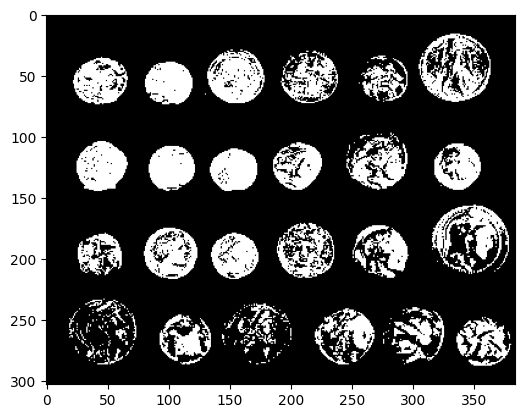

In [77]:
Y = segmenta(X,150)
plt.imshow(Y,cmap='gray')
plt.show()

## Definición de un fondo homogéneo

El propósito de este código es:

* Normalizar la iluminación por filas
* Reducir variaciones de fondo
* Mejorar el contraste local
* Facilitar la segmentación posterior

Por ejemplo:

Si una fila tiene valores [100, 120, 150] y el mínimo es 100 después de la normalización: [0, 20, 50]

Esto es útil cuando:

* Hay variaciones de iluminación en la imagen
* El fondo no es uniforme
* Se necesita resaltar objetos sobre el fondo
* Se quiere preparar la imagen para segmentación

La imagen resultante tendrá:

* Fondo más uniforme
* Objetos más destacados
* Mejor contraste local
* Más facilidad para aplicar umbralización

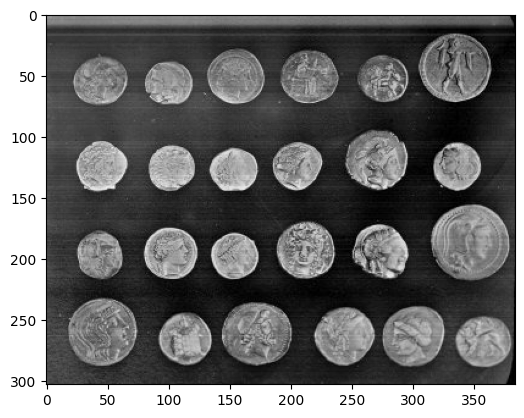

In [78]:
# 1. Obtiene las dimensiones de la imagen
(N,M) = X.shape  # N = número de filas, M = número de columnas

# 2. Crea una matriz vacía del mismo tamaño
Xm = np.zeros((N,M), np.uint8)  # Matriz de ceros de 8 bits

# 3. Procesa cada fila de la imagen
for i in range(N):
    xmin = np.min(X[i,:])  # Encuentra el valor mínimo de la fila
    Xm[i,:] = X[i,:] - xmin  # Resta el mínimo a toda la fila

# 4. Visualiza el resultado
plt.imshow(Xm, cmap='gray')
plt.show()

area =  37003


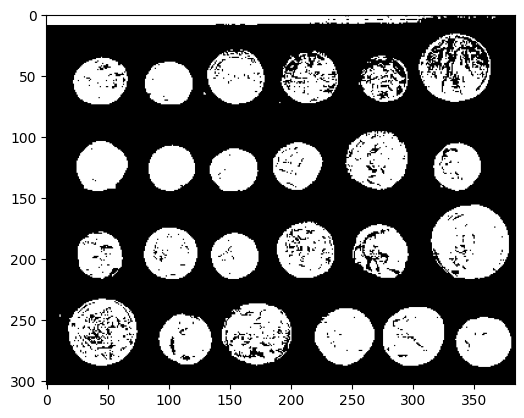

In [ ]:
Y = segmenta(Xm, 100)
plt.imshow(Y,cmap='gray')
plt.show()